## Module 1
# Dynamic response of measurement systems

In some tests, one is only concerned by the steady nature of a signal.  The results are considered _static_.  In other cases, the time rate of change is small enough that the measurand can be considered _pseudo-static_.  In some practical applications, however, one is interested in the transient nature of the measurand, one needs then to perform _dynamic_ measurements.  Therefore, the dynamic response of the system must be taken into account.  

Below are data we took in my group of velocity and temperature.  It is a flow between two reservoirs, where hot helium leaves the first reservoir and enters the second and is replaced by nitrogen flowing from the second reservoir to the first.  This type of buoyancy driven flow is called a lock exchange.  The velocity was acquired with a laser technique that relies on displacement of molecular tracers and the temperature was recorded with a thermocouple.  The flow was a flow of helium, which is a very poor heat transfer medium.  What do you think happened here?

![title](img/DCC1_lag_corrected1_raw.png)

The two profiles appear to be correlated, meaning that they have similar shape.  You might know that there is a statistical tool to estimate the level of correlation between the two curves.  Here one can add a lag of -18 s to the temperature data and make it match the time history of the velocity (at least in the initial phase) fairly well.  Here are the same data, but plotted with the shift. 

![title](img/DCC1_lag_corrected1_shifted.png)

There is still a disagreement on the profile shape, especially the rise time.  This raises two questions: 1- What causes the lag in response? 2- What causes the difference in rise times?

This is evidence that one must be careful in selecting our sensor for transients.  Let's use a simple model to predict general behaviors of sensors.

In general the dynamic response of a sytem, $y(t)$, can be modeled with an ordinary differential equation (ode):

\begin{align*}
a_n\frac{d^ny}{dt^n} + a_{n-1}\frac{d^{n-1}y}{dt^{n-1}}x + \dots + a_1 \frac{dy}{dt} + a_0 y = F(t)
\end{align*}

The order $n$ of the ode is also called the order of the system.  For the purpose of this class (and because it describes well most components of a measurement system) we will only study systems of order 0, 1, and 2.  To characterize the dynamic response of systems one typically uses a set of known functions.  Here we will use step function and sinusoidals.  You probably saw others in dynamics (at least Dirac and ramp).


##  0$^{\mathrm{th}}$ order system

A 0$^{\mathrm{th}}$ order system has the equation:
\begin{align*}
y(t) = K F(t) = \frac{1}{a_0} F(t)
\end{align*}

This is what we would call an ideal system, the output is directly coupled to the input.  In other words, the output is in phase with the input and direclty proportional to the input.  The term $K=1/a_0$ is called the _static sensitivity_ or _steady-state gain_.  It is obtained (independent of any system order) when performing static calibration.

The strain gauge is a good example of this.  However, once it is connected to flexible membrane (to make a type of pressure transducer for example) then the membrane vibration makes the overall system second order.

##  1$^{\mathrm{st}}$ order system

A 1$^{\mathrm{st}}$ order system has the equation:
\begin{align*}
a_1 \frac{dy}{dt} + a_0 y & = F(t) \\
\tau \frac{dy}{dt} + y & = K F(t)
\end{align*}
with $\tau = a_1/a_0$ the time constant of the system.  

Sensors that fall in that category are thermometers, thermcouples.  They are instruments that exhibit a lag due the _capacity_ of the instrument.  For thermal sensing devices, the capacity could be understood as the time it takes for the sensing element to become in thermal equilibrium with its surroundings.  For a thermocouple the parameters are:
\begin{align*}
\tau = \frac{mC}{h_{sf}A_s}
\end{align*}
with $m$: mass of thermocouple, $C$ specific heat of the thermcouple, $h_{sf}$ convection heat transfer coefficient from fluid to the sensor, and $A_s$ sensing surface area of the thermcouple.

Let's derive the governing equation for a thermocouple.

### Response to step-input

At $t\leqslant0$, $F(t) = 0$ and $y=y_0$, and $F(t)=A$ at $t > 0$.  The solution of the 1$^{st}$ order ode is:

\begin{align*}
y(t) = KA + (y_0 - KA)e^{-t/\tau}
\end{align*}

As $t \rightarrow \infty$, $y\rightarrow y_\infty = KA$.  At $t/\tau=1$ the signal has reached 63.21% of $y_\infty$, $t/\tau=5$, $y/y_\infty > 99\%$. The equation above can be normalized by introducing the magnitude ratio, $M(t)$.

\begin{align*}
M(t) = \frac{y(t)-y_0}{y_\infty - y_0} = 1 - e^{-t/\tau}
\end{align*}

_Question_: 
> How would you define the dynamic error, $\epsilon_f(t)$.


### Response to sinusoidal-input
Here $F(t) = A \sin \omega t$, with $\omega=2\pi f$ the radiant frequency in rad/s ($f$ is the frequency in Hz).

After some math, the solution of the ode is:
\begin{align*}
y(t) & = \left( y_0 + \frac{\omega \tau KA}{1+\omega^2 \tau^2} \right) e^{-t/\tau} + \frac{KA}{\sqrt{1+\omega^2\tau^2}} \sin(\omega t + \phi)\\
\mathrm{with\,the\,phase}\\
\phi & = \tan^{-1}(-\omega \tau) = -\tan^{-1}(\omega \tau)
\end{align*}

The second term on the RHS represents the _transient response_, while the third is the _steady-state response_.  When $\omega \tau << 1$ the transient response is negligible and the output follows the input closely.  When $\omega \tau >> 1$ the output is attenuated and its phase is shifted from the input by $\phi$ (in radians).  The _phase lag_ (in seconds), or lag time, $\beta$, is:

\begin{align*}
\beta = \frac{\phi}{\omega}
\end{align*}

_Question_:
> Do you think that the dynamic error, $\epsilon_f(t)$, defined above is appropriate in this case?

At steady-state, the magnitude ratio becomes:
\begin{align*}
M(\omega) = \frac{y - y_0}{KA} = \frac{1}{\sqrt{1+\omega^2 \tau^2}}
\end{align*}
and the dynamic error, 
\begin{align*}
\epsilon_f(\omega) = 1 - \frac{1}{\sqrt{1+\omega^2 \tau^2}}
\end{align*}

Let's plot the results

In [6]:
import numpy

def y_sin(t,T,tau,y_0,K,A):
   ''' Calculate the output of a first order ode when forcing function is 
   a sine wave of frequency f with phase phi
   Arguments
   ---------
   t: time (in second)
   T : period of the forcing sine wave (s)
   tau: time constant of the system (s)
   K: static sensitivity (dimensionless)
   A: amplitude of forcing (unit of F)
   Returns
   -------
   y_sin : Output of 1st order ode, see eqn above.
   '''    
   omega = 2*numpy.pi/T # convert f to radial frequency
   phi = -numpy.arctan(omega*tau) 
   y_sin = (y_0 + (omega*tau*K*A)/(omega**2*tau**2+1))*numpy.exp(-t/tau) + K*A/(numpy.sqrt(omega**2*tau**2+1)) \
    *numpy.sin(omega*t+phi)
   
   return y_sin

t=numpy.linspace(0.0,10.0,num=100) # (s)

#print('t = ', t)

T = 5 # (s)
tau = 1 # (s)
y_0 = 0
K = 1
A = 1

y_out = y_sin(t,T,tau,y_0,K,A)

#print(y_out)

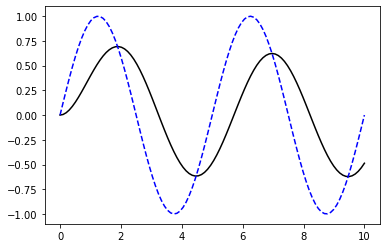

In [7]:
from matplotlib import pyplot
%matplotlib inline

pyplot.plot(t, y_out, color='k', linestyle='-') # output
pyplot.plot(t, A*numpy.sin(2*numpy.pi/T*t), color='b', linestyle='--'); # input



Let's also plot the magnitude ratio and phase

In [8]:
def M_1(omega,tau):
   ''' calculate the magnitude ratio for first order ode
   Arguments
   ---------
   omega_range : range of angular frequencies
   tau: time constant of the system (s)
   Returns
   -------
   M_1 : Magnitude ratio of 1st order ode, see eqn above.
   '''    
   M_1 = 1/(numpy.sqrt(omega**2*tau**2+1)) 

   return M_1  

def phi_1(omega,tau):
   ''' calculate the phase delay
   Arguments
   ---------
   omega_range : range of angular frequencies
   tau: time constant of the system (s)
   Returns
   -------
   phi_1 : phase delay for 1st order ode, see eqn above. (deg)
   '''    
   phi_1 = -180/numpy.pi*numpy.arctan(omega*tau) 

   return phi_1

omega_range = numpy.logspace(-2,2,num=100)
#print(omega_range)

M1 = M_1(omega_range,tau)
phi1 = phi_1(omega_range,tau)
#print(phi1)

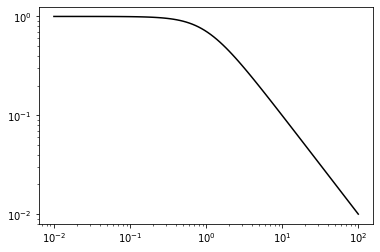

In [9]:
pyplot.plot(omega_range, M1, color='k', linestyle='-') #, label='square')
pyplot.xscale('log')
pyplot.yscale('log')

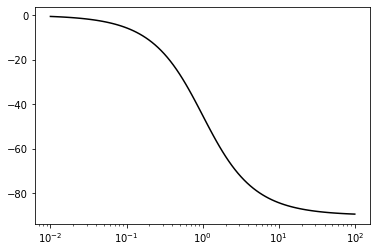

In [10]:
pyplot.plot(omega_range, phi1, color='k', linestyle='-') #, label='square')
pyplot.xscale('log')

_Example 1_

A thermocouple is immersed in a fluid and connected to a data acquisition system.  The overall static sensitivity of the sensor and DAQ is 10 mV/K (the output $E(t)$ is in mV).  The fluid temperature varies sinusoidally: $T=300+50 \sin 3 t$.  The time constant of the thermocouple is $\tau = 0.5$ s.  Determine:

> $E(t)$,

> time delay, $\beta$,

> The steady state magnitude ratio, $M(\omega)$.


In [11]:
import numpy
A=50 # K
K=10 # mV/K
omega = 3 # rad/s
tau = 0.5 # s

E = K*A/(numpy.sqrt(1+omega**2*tau**2)) #mV
print(E, ' mV')

phi = numpy.arctan(-omega*tau)
beta = phi/omega
print(beta, ' s')

277.35009811261455  mV
-0.3275979077491097  s


_Example 2_

We are tasked to measure the steady-state temperature of a machine.  The temporal response can be modeled by the sum of two sinuses:

\begin{align*}
F(t) = 350 + 20 \sin (2\pi 0.1 t) + 2 \sin (2 \pi 0.01 t)
\end{align*}

The thermocouple we selected has a temporal response of $\tau = 10$ s.  Assume $K = 1$ mv/K.

> Plot the steady-state temperature

> Plot the measured temperature

> Comment on the shape of the measured signal.

> How could you improve the fidelity of the measured signal?

-0.44976077178312396 -0.17856615352967808 rad


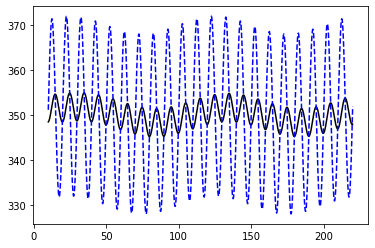

In [20]:

t=numpy.linspace(10.0,220.0,num=10000) # (s)
tau = 10 # (s)

T1 = 10 # (s)
y_01 = 0
K = 1
A1 = 20
y_out1 = y_sin(t,T1,tau,y_01,K,A1)

T2 = 100 # (s)
y_02 = 0
K = 1
A2 = 2
y_out2 = y_sin(t,T2,tau,y_02,K,A2)

y = 350 + A1*numpy.sin(2*numpy.pi/T1*t) + A2*numpy.sin(2*numpy.pi/T2*t)

pyplot.plot(t, y_out1+y_out2+350, color='k', linestyle='-') # output
pyplot.plot(t, y, color='b', linestyle='--'); # input

phi1= - numpy.arctan(2*numpy.pi/T1*tau)
phi2= - numpy.arctan(2*numpy.pi/T2*tau)
print(phi1/numpy.pi, phi2/numpy.pi, 'rad')

### deciBel and bandwidth


The magnitude ratio (which we are going to be related to _gain_ very soon) is expressed in units of decibels.  The Bel is defined as the $\log_{10}$ of the gain, with _gain_, $G$, the ratio of output to input powers.  

\begin{align*}
G = & \frac{P_{out}}{P_{in}}\\
\end{align*}

1 Bel (symbol B) is a factor of 10 in power. The logarithmic power ratio $L_p$:

\begin{align*}
L_p = & \log_{10} (G) = \log_{10} \left( \frac{P_{out}}{P_{in}} \right) \text{B}
\end{align*}

1 decibel (dB) is a factor of $10^{1/10} \sim 1.259$ in power.

\begin{align*}
1 \, \text{dB} & = \frac{1}{10}\, \text{B}\\
10 \, \text{dB} & = 1\,\text{B} \\
L_p & = 10 \log_{10} (G) \, \text{B}
\end{align*}

Some useful approximations

\begin{align*}
\log_{10} 2 & \sim 0.30103 \sim 0.3\\
-3\,\text{dB} & \sim \text{factor of two LESS power}\\
7\,\text{dB} & \sim \text{factor of five MORE power}\\
6\,\text{dB} & \sim \text{factor of four MORE power}\\
-34\,\text{dB} & \sim \text{factor of } 4\times 10^{-4} \text{LESS power}\\
\end{align*}

Because power is typically the square of a quantity ($P=y^2$), then the decibel becomes:

\begin{align*}
\mathrm{dB} = 20 \log_{10} \frac{y_{out}}{y_{in}} = 20 \log_{10} M(\omega)
\end{align*}

<img src="img/GrahamBell.png" width="240">

The decibel was introduced in sounds first when the telephone was developed.  It is a relative unit, but it is used as absolute unit in some fields:

\begin{array}{l l }
\text{telephony} & 0\, \text{dB} = 1\,\text{mW into 600}\,\Omega\\
\text{cable TV} & 0\, \text{dB} = 1000\,\mu \text{V into 75}\,\Omega\\
\text{acoustics} & 0\, \text{dB} = 2\times 10^{-10}\, \text{bar in air} = 10^{-12} \, \text{W/m}^2
\end{array}


__Bandwidth__ is described as the range of frequency over which the magnitude is attenuated by less than -3 dB (70.7%).  The frequency at which the amplitude is decreased by -3 dB is called the __cutoff frequency__. Depending on the nature of the system, it can have a _low cutoff frequency_ and a _high cutoff frequency_.  The _center frequency_ will be deined as the average of the low and high cutoff frequencies.  

_example_

Determine the cutoff frequency(ies) and bandwidth of a first order system having time constant $\tau = 0.01$ s that is forced by a sinusoidal waveform.

##  2$^{\mathrm{nd}}$ order system

A 2$^{\mathrm{nd}}$ order system has the equation:
\begin{align*}
a_2 \frac{d^2y}{dt^2} + a_1 \frac{dy}{dt} + a_0 y = F(t)
\end{align*}

The equation above can be rewritten as:
\begin{align*}
\frac{1}{\omega^2_n} \frac{d^2y}{dt^2} + \frac{2\zeta}{\omega_n} \frac{dy}{dt} + y = K F(t)
\end{align*}

Here $\omega_n = \sqrt{a_0/a_2}$ is the natural frequency of the system and $\zeta = a_1/2\sqrt{a_0a_2}$ is the damping ratio.

This is typically a spring, mass, damper system.  It models sensors with _inertia_, for example, accelerometers, pressure transducers, etc.  For pressure transducers the inertia can be seen as the time it takes for the membrane to start deflecting and it will keep moving under its own inertia even after the pressure stops.   

The solution for second order ode is more complicated than for first order.  The form of the homogeneous solution depends on the roots of its characteristic equation:
\begin{align*}
\frac{1}{\omega^2_n} r^2 + \frac{2\zeta}{\omega_n} r + 1 = 0
\end{align*}

The roots are:
\begin{align*}
r_{1,2} = - \zeta \omega_n \pm \omega_n\sqrt{\zeta^2-1}
\end{align*}
Depending on the value of the discriminant $\zeta^2-1$ there can be three solutions to the homogeneous equation:
> 1- $\zeta^2-1>0$, the roots are real, negative, and distinct. The homogeneous solution takes the form:
\begin{align*}
y_h(t) = c_1 e^{r_1 t} + c_2 e^{r_2 t}
\end{align*}

> 2- $\zeta^2-1=0$ the roots are real, negative, and not distinct ($r=-\omega_n$).  Then,
\begin{align*}
y_h(t) = c_1 e^{-\omega_n t} + c_2 t e^{-\omega_n t}
\end{align*}

> 3- $\zeta^2-1<0$ the roots are complex and distinct ($r_{1,2} = \lambda \pm i \mu$, $\lambda$ is negative):
\begin{align*}
y_h(t) = e^{\lambda t} (c_1 \cos \mu t + c_2 \sin \mu t)
\end{align*}

Note that for the three cases, the homogeneous solutions all have an exponential term that is negative in time, so the homogeneous solutions will decay to 0, they are the transient solutions.  For each of three cases identified above, one can characterize the transient solution as: For $\zeta^2-1>0$ the system is __over damped__, for $\zeta^2-1=0$ the system is __critically damped__, and for $\zeta^2-1<0$, the system is __under damped__.

### Response to step-input

> 1- $\zeta^2-1>0$, or the over damped case.  The overall response (homogeneous and particular solution) takes the form:

\begin{align*}
y(t) = KA \left[ 1-e^{-\zeta \omega_n t}\left(\cosh \left( \omega_n t \sqrt{\zeta^2 - 1} \right) \right) + \frac{\zeta}{\sqrt{\zeta^2-1}} \sinh \left( \omega_n t \sqrt{\zeta^2 - 1} \right) \right]
\end{align*}

> 2- $\zeta^2-1=0$, or the critically damped case.

\begin{align*}
y(t) = KA \left[1-e^{-\omega_n t} (1+\omega_n t) \right]
\end{align*}

> 3- $\zeta^2-1<0$, or the under damped case.

\begin{align*}
y(t) & = KA \left[ 1-e^{-\zeta \omega_n t} \left( \frac{1}{\sqrt{1-\zeta^2}} \sin \left( \omega_n t \sqrt{1-\zeta^2} + \phi \right) \right) \right] \\
\textrm{with}\\
\phi & = \sin^{-1}\left( \sqrt{ 1 - \zeta^2} \right)
\end{align*}

Here the time constant is $1 /\zeta \omega_n$. SEE FIRST ORDER DECOMPOSITION IN : https://apmonitor.com/pdc/index.php/Main/SecondOrderSystems

<img src="img/2ndorderStep.png" width="460">

Add Definition of rise and settling times.

Add discussion of fastest response to steady-state solution.

### Response to sinusoidal-input

Here we will neglect the transient response, because the homogeneous solution tends to 0 as time increases.  The steady-state solution will be the particular solution only and we will focus on it solely.

The particular solution is (for $F(t) = A \sin(\omega t)$):
\begin{align*}
y_p(t) = \frac{KA \sin(\omega t + \phi(\omega))}{\left( [1-(\omega/\omega_n)^2]^2 + [2\zeta \omega / \omega_n]^2 \right)^{1/2}}
\end{align*}

The phase lag (in radian) is:

\begin{align*}
\phi (\omega) & = - \tan^{-1}\left( \frac{2\zeta \omega/\omega_n}{1-(\omega/\omega_n)^2}  \right) \; \mathrm{for} \frac{\omega}{\omega_n} \leqslant 1 \\
\phi (\omega) & = - \pi - \tan^{-1}\left( \frac{2\zeta \omega/\omega_n}{1-(\omega/\omega_n)^2}  \right) \; \mathrm{for} \frac{\omega}{\omega_n} \geqslant 1
\end{align*}

The steady-state solution of the magnitude ratio, $M(\omega)$, is simply (divide $y_p$ by $KA \sin(\omega t)$:

\begin{align*}
M(\omega) = \frac{1}{\left( [1-(\omega/\omega_n)^2]^2 + [2\zeta \omega / \omega_n]^2 \right)^{1/2}}
\end{align*}

Like for first-order systems, the dynamic error is defined as:
\begin{align*}
\epsilon_f (\omega) = 1 - M(\omega)
\end{align*}



In [26]:
def M_2(omega,omega_n,zeta):
   ''' calculate the magnitude ratio for second order ode
   Arguments
   ---------
   omega_range : range of angular frequencies
   omega_n : natural frequency of the system (rad/s)
   zeta : damping coefficient
   Returns
   -------
   M_2 : Magnitude ratio of 2nd order ode, see eqn above.
   '''    
   M_2 = 1/numpy.sqrt( (1-omega**2/omega_n**2)**2 + (2*zeta*omega_range/omega_n)**2 )

   return M_2


omega_n = 1 # (Hz)


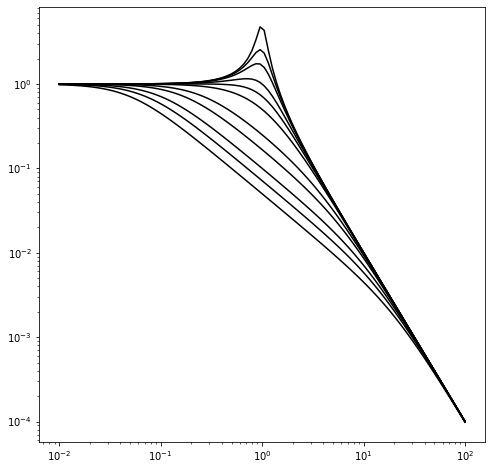

In [23]:
fig = pyplot.figure(figsize=(8,8))
zeta_range = [0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 3, 5, 7, 10]
for zeta in zeta_range:
    M2 = M_2(omega_range,omega_n,zeta)
    pyplot.plot(omega_range, M2, color='k', linestyle='-')
pyplot.xscale('log')
pyplot.yscale('log')

_Example_

A pressure transducer is connected to a test section through a piece of flexible tubing (this configuration is typical of wind tunnel testings).  The pressure measured as the following waveform:
\begin{align*}
P(t) = 20 \sin 3 t
\end{align*}

Both the tubing and pressure transducers behave as linear second order systems.  The natural frequencies of the transducer and tubing are 1,000 Hz and 20 Hz, respectively.  Their damping ratios are $\zeta_{trans} = 0.7$ and $\zeta_{tube} = 0.3$.

Find the magnitude of the attenuation and phase lag of the pressure signal as outputed by the transducer.  

_Note_ Because the system is linear, the overall magnitude ratio of the system, $M_s$, and phase lag, $\phi_s$, are:
\begin{align*}
M_s(\omega) & = M_{tube}(\omega) \times M_{trans}(\omega) \\
\phi_s(\omega) & = \phi_{tube}(\omega) \times \phi_{trans}(\omega)
\end{align*}

### Distortion

An ideal system should also have a magnitude ratio that is independent of input signal (we did not derive a model for this here as we assumed this was respected).  We then talk of __linear amplitude response__. If the system stops responding linearly, it is __overdriven__.  This is what happens with operational amplifiers when we saturate them with an input voltage that is too big.

In light of the dynamic system response seen above, we can now understand frequency response.  A system is said to have __linear frequency response__ if it treats all the frequencies in a signal with the same magnitude ratio (ratio of output over input) and phase shift over the frequency range of interest.  

If phase shifts are large and the input waveform complex, the output waveform will have severe distortions.  In fact, the other two parameters seen above will contribute to distortions of the sensed signal.  __Distortion__ can be defined as the deviation of a signal from its true form.  In music distortions should be avoided when one records a signal (to truly capture the desired sound), but can be taken advantage of it to generate new sounds (think Jimmy Hendrix).  For music recording on digital devices (CD's in the 80's, mp3's now), special rules have been developed to minimize distortions.  We will see them soon when we describe digital data acquisition (in this context this will be referred to as __aliasing__), but before that we will need to discuss spectral content of signals and Fourier transforms.


Now let's go back to the data taken in my lab of thermcouple and velocity:

![title](img/DCC1_lag_corrected1_raw.png)

Let's try to provide answers to the two questions:

> 1- What causes the lag in response? 

> 2- What causes the difference in rise times?
